# РК №1.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему  
https://www.kaggle.com/mohansacharya/graduate-admissions  
(файл Admission_Predict_Ver1.1.csv)


## Текстовое описание набора данных 

В качестве набора данных мы будем использовать набор данных по предсказанию поступления в аспирантуру

Данные доступны по ссылке https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
Эта задача является актуальной для людей, собирающихся поступать в аспирантуру, и которым необходимо оценить свои шансы.

Датасет состоит из 1 файла:
- Admission_Predict.csv

Файл содержит следующие колонки:
- GRE Score  - баллы за экзамен GRE для поступления в магистратуру/аспирантуру.
- TOEFL Score - баллы за экзамен TOEFL по английскому.
- University Rating - рейтинг университета.
- SOP - мотивация соискателя
- LOR - сила рекомендательного письма.
- CGPA - средний балл аттестата.
- Research - наличие опыта в исследовательских работах.
- Chance of Admit - шанс приема.
- University - название университета

# Добавляем библиотеки

In [4]:
%pip install -q seaborn
%pip install -q scipy

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# Первичный анализ

In [7]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.shape

(500, 9)

In [5]:
data.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Обработка пустых значений для числового признака - импьютация (imputation)

In [6]:
# Проверим наличие пустых значений
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [11]:
# В имеющихся данных нет пропусков, создадим пропуски для числового признака GRE Score
data.loc[:49, 'GRE Score'] = None

In [16]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка GRE Score. Тип данных float64. Количество пустых значений 50, 10.0%.


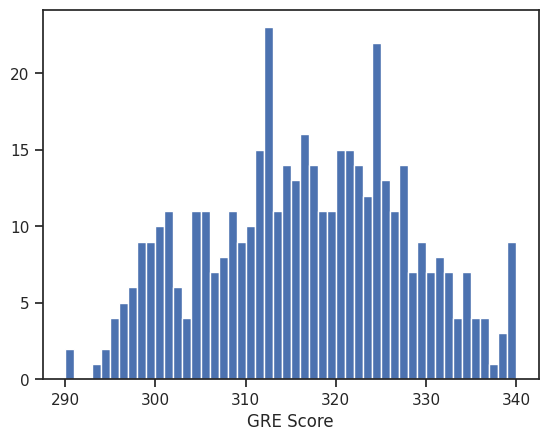

In [20]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [35]:
# Создание экземпляра SimpleImputer 
imputer = SimpleImputer(strategy='median')

# Преобразование данных и заполнение пропущенных значений
data['GRE Score'] = imputer.fit_transform(data[['GRE Score']])

In [36]:
# Проверим наличие пустых значений
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


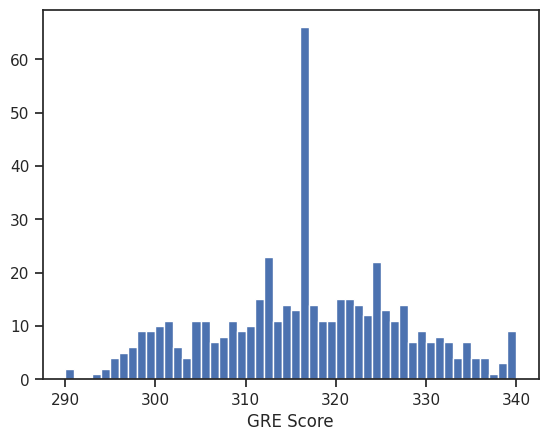

In [45]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

# Кодирование категориальных признаков

### Категориальные признаки отсутствую, поэтому создадим новую колоку Country - страну университета

Если баллы за TOEFL больше 115, то Англия.

Если баллы за TOEFL больше 107, но не более 115 то Фрнация.

В остальных случаях Индия.

In [60]:
type(data)

pandas.core.frame.DataFrame

In [66]:
def assign_country(score):
    if score > 115:
        return 'Great Britain'
    elif score > 107:
        return 'France'
    else:
        return 'India'

data['country'] = data['TOEFL Score'].apply(assign_country)

In [67]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,country
0,1,316.0,118,4,4.5,4.5,9.65,1,0.92,Great Britain
1,2,316.0,107,4,4.0,4.5,8.87,1,0.76,India
2,3,316.0,104,3,3.0,3.5,8.00,1,0.72,India
3,4,316.0,110,3,3.5,2.5,8.67,1,0.80,France
4,5,316.0,103,2,2.0,3.0,8.21,0,0.65,India


# Построение парных диаграмм

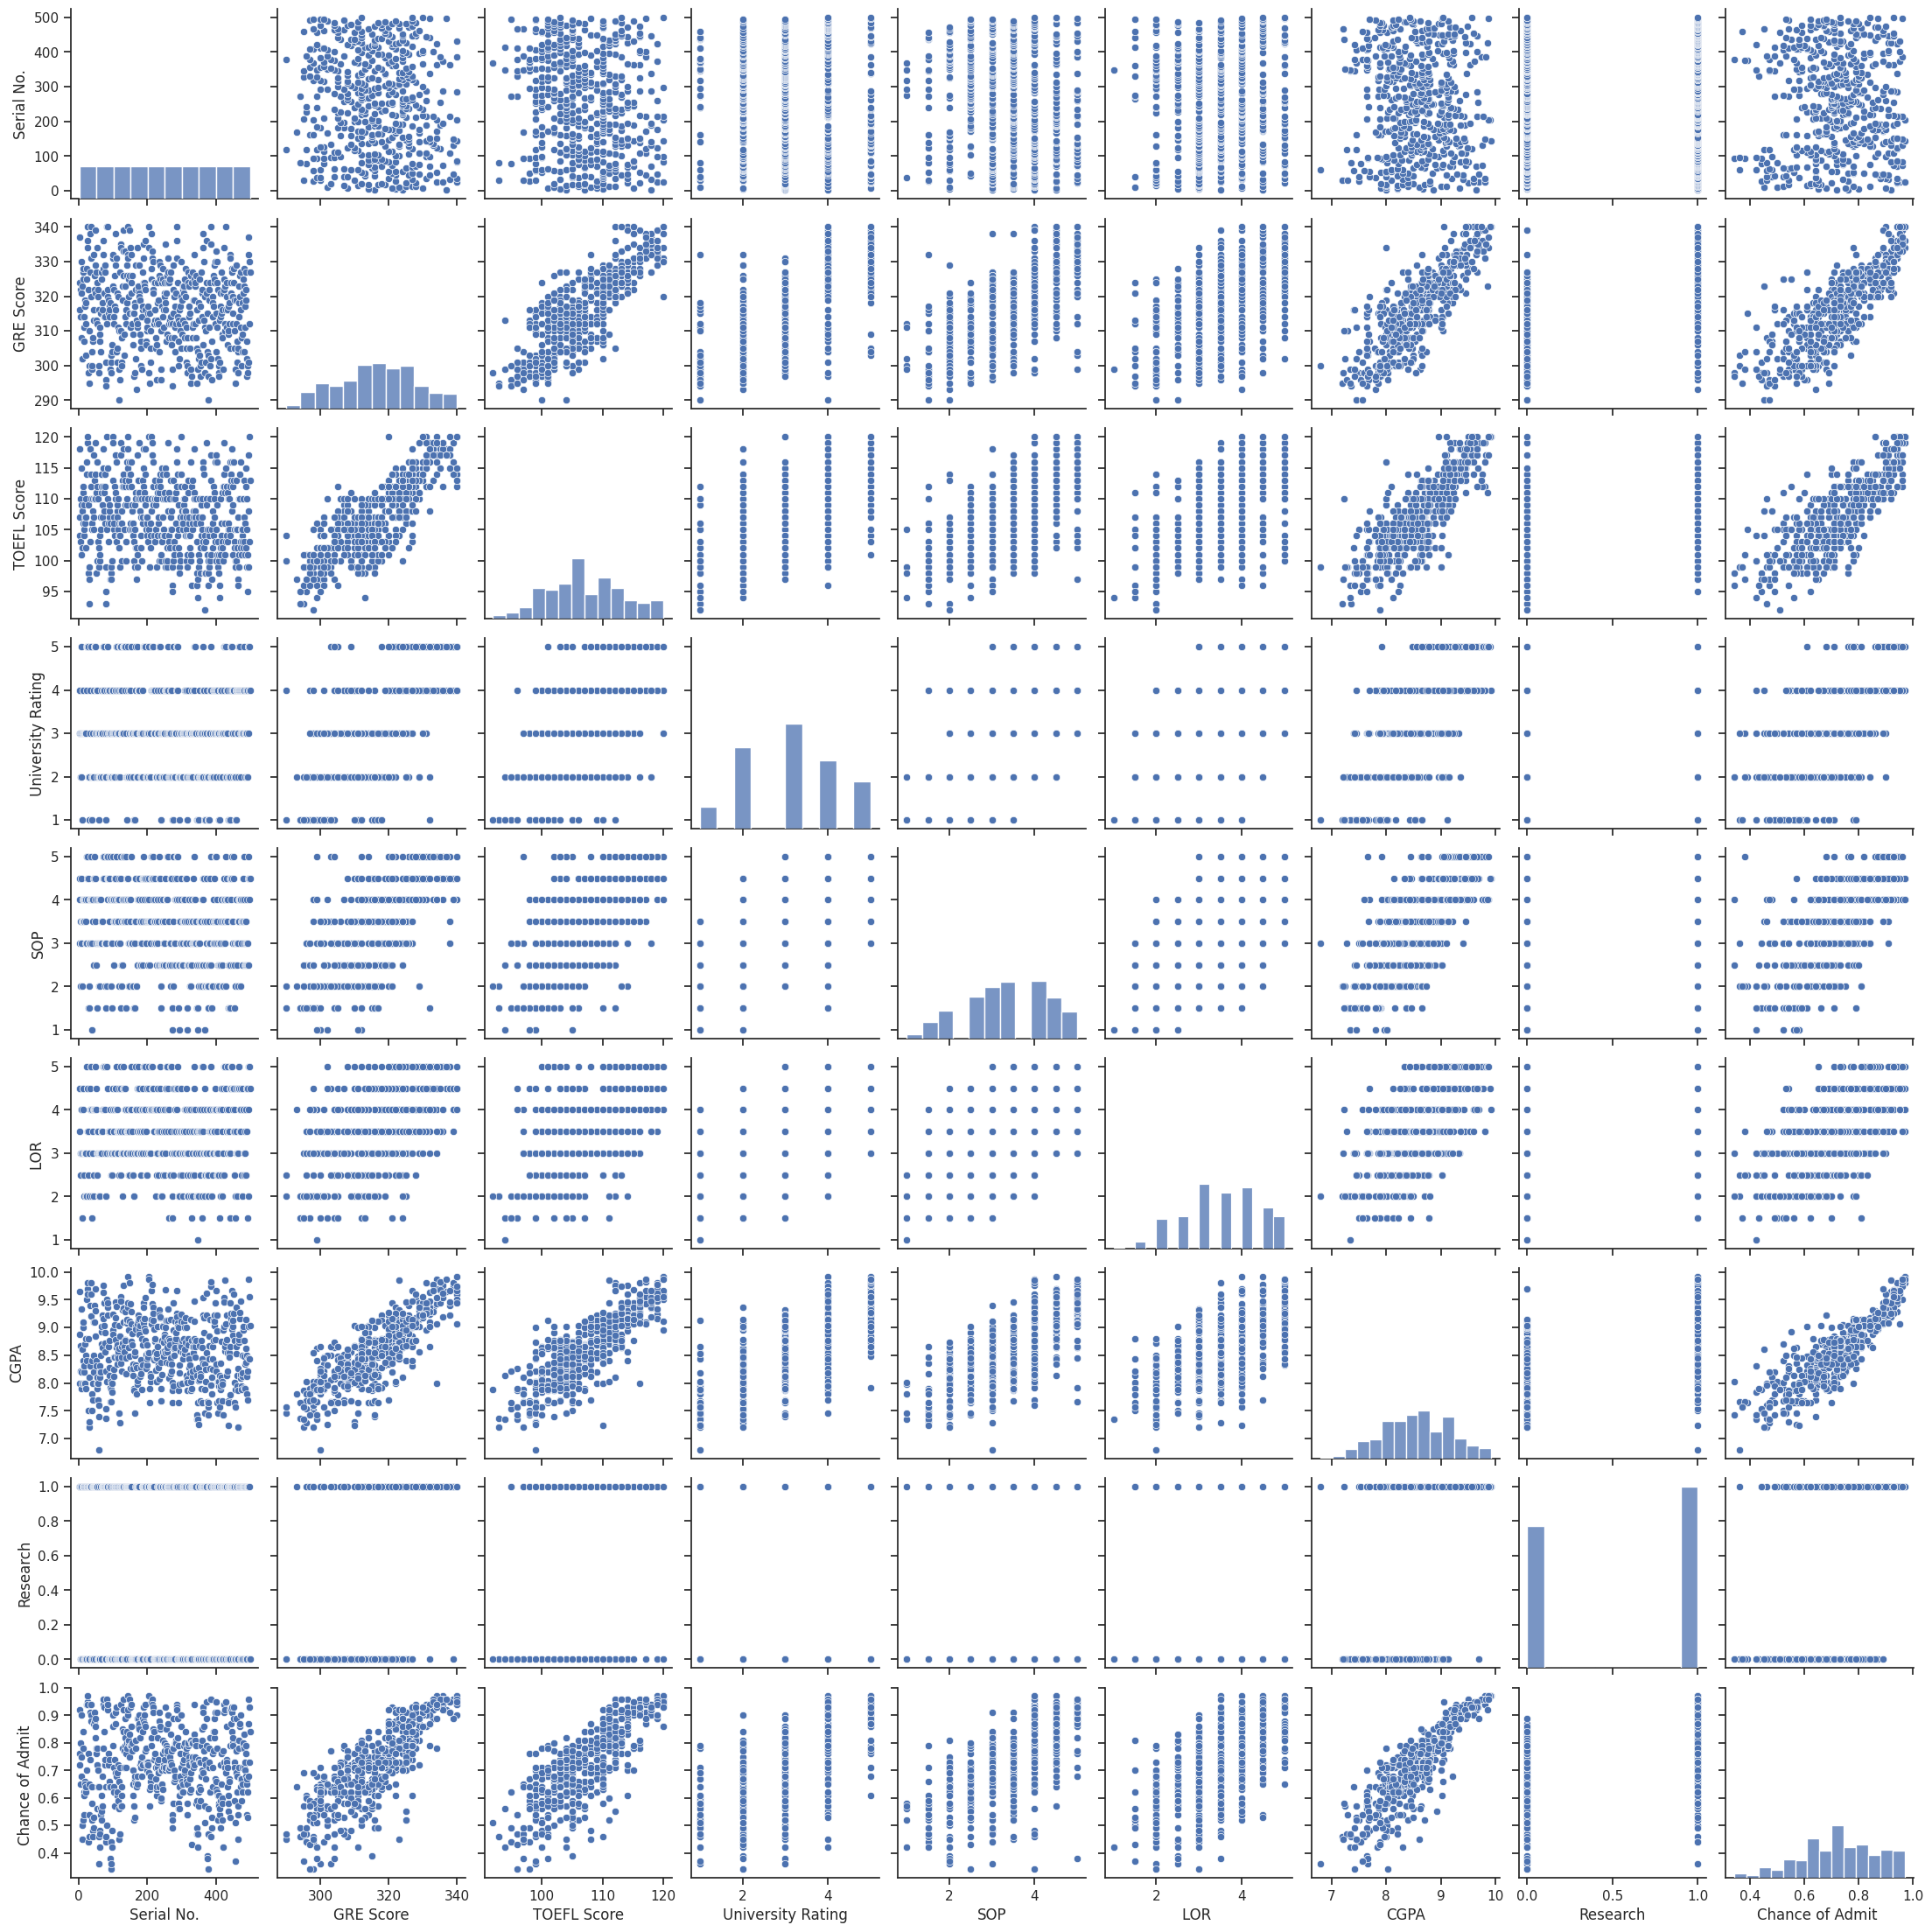

In [8]:
sns.pairplot(data)